# Hamiltonian Dynamics

$$
H(p, q) = \frac{1}{2} p^T M^{-1}(q) p + V(q)
$$

$$
p = M(q) \dot{q}
$$

$$
\dot{q} = \nabla_p H(p, q)
$$

$$
\dot{p} = -\nabla_q H(p, q) + f
$$

In [1]:
import numpy as np
from numpy import pi

In [ ]:
import torch
from torch import cos, tensor

In [2]:
def F(H):
    def grad_H(q, p):
        q = tensor(q, requires_grad=True, dtype=torch.float64)
        p = tensor(p, requires_grad=True, dtype=torch.float64)
        Hpq = H(q, p)
        Hpq.backward()
        dq = q.grad
        dp = p.grad
        return np.concatenate((dq.numpy(), dp.numpy()), 0)
    def f(t, qp):
        qp = np.array(qp)
        n = len(qp) // 2
        q, p = qp[:n], qp[n:]
        grad_Hqp = grad_H(q, p)
        d_qp = np.concatenate((grad_Hqp[n:], -grad_Hqp[:n]), 0)
        return d_qp
    return f

In [3]:
m = 1
g = 1

def K(q, p):
    p = p[0]
    return 0.5 / m * p * p

def V(q):
    q = q[0]
    return - m * g * cos(q)

def H(q, p):
    return K(q, p) + V(q)

In [4]:
from scipy.integrate import solve_ivp

In [5]:
t_span = [0.0, 20.0]
r = solve_ivp(fun=F(H), y0 = [pi/2, 0.0], t_span=t_span, dense_output=True) 

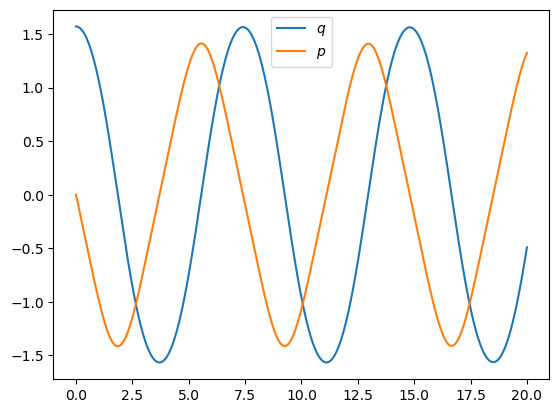

In [6]:
import matplotlib.pyplot as plt
t = np.linspace(t_span[0], t_span[1], 1000)
sol = r.sol
plt.plot(t, sol(t)[0], "C0", label=r"$q$")
plt.plot(t, sol(t)[1], "C1", label=r"$p$")
plt.legend()
None